In [1]:
import pandas as pd
import numpy as np
import datetime

# 导入必要的库
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [28]:
# 计算基本的时域特征

def getTimeStatic(data):


    mean_values = np.mean(data, axis=1)  # 计算每个样本的均值
    std_dev_values = np.std(data, axis=1)  # 计算每个样本的标准差
    max_values = np.max(data, axis=1)  # 计算每个样本的最大值
    min_values = np.min(data, axis=1)  # 计算每个样本的最小值
    abs_data=np.abs(data)
    abs_mean_values=np.mean(abs_data,axis=1)



    # 更复杂的时域特征
    # 均方根值（RMS）
    rms_values = np.sqrt(np.mean(data**2, axis=1))

    # 信号的峰值
    peak_values = max_values - min_values

    # 信号的形状指标（波形的峰度）
    shape_factor = rms_values / (np.abs(data).mean(axis=1))

    # 信号的脉冲指标（波形的峰值除以均方根值）
    impulse_factor = max_values / rms_values

    # 信号的裕度指标（波形的峰值除以平均绝对值）
    crest_factor = max_values / np.abs(data).mean(axis=1)

    # 计算每个样本的特征
    features = np.column_stack((mean_values, std_dev_values, max_values, 
                                min_values, rms_values, peak_values, 
                                shape_factor, impulse_factor, crest_factor,abs_mean_values))

    return features


In [27]:
df_train= pd.read_excel('../trainData.xlsx',engine='openpyxl')

In [13]:
df_train.loc[1002,:]

0        0.143641
1        0.595785
2        0.124247
3        1.095390
4        0.844144
           ...   
4092     2.101783
4093     1.244253
4094     0.458459
4095    -0.456390
ladle    1.000000
Name: 1002, Length: 4097, dtype: float64

In [29]:
train_data= getTimeStatic(df_train.iloc[:,0:4096].values)
df_train_=pd.DataFrame(data=train_data,columns=['mean_v','std_v','max_v','min_v','rms_v','peak_v','shape_v','impulse_factor','crest_v','abs_mean_v'])

In [30]:
df_train_clear=pd.merge(left=df_train,right=df_train_,left_index=True,right_index=True,how='inner')

In [31]:
df_train_clear.head(2)

0         1         2         3         4         5         6  \
0  1.366090  0.569916  0.953181 -1.446556 -0.010715 -2.496672 -0.457135   
1 -0.237919  0.660790  0.163323 -0.983277  1.332190 -0.080136  1.073564   

          7         8         9  ...    mean_v     std_v     max_v     min_v  \
0 -1.198446  0.337351 -0.011873  ...  0.017151  1.317554  5.590916 -5.736414   
1  0.719082 -0.782411 -0.560653  ...  0.014384  1.375377  8.833191 -8.392787   

      rms_v     peak_v   shape_v  impulse_factor   crest_v  abs_mean_v  
0  1.317666  11.327330  1.313586        4.243046  5.573604    1.003106  
1  1.375453  17.225978  1.420337        6.422025  9.121439    0.968399  

[2 rows x 4107 columns]

In [3]:
df_train_clear=pd.read_excel('./data/train_factor.xlsx',engine='openpyxl')

In [32]:
df_train_factor=df_train_clear[['mean_v','abs_mean_v','std_v','max_v','min_v','rms_v','peak_v','shape_v','impulse_factor','crest_v','ladle']]

In [33]:
df_train_factor.head(2)

mean_v  abs_mean_v     std_v     max_v     min_v     rms_v     peak_v  \
0  0.017151    1.003106  1.317554  5.590916 -5.736414  1.317666  11.327330   
1  0.014384    0.968399  1.375377  8.833191 -8.392787  1.375453  17.225978   

    shape_v  impulse_factor   crest_v  ladle  
0  1.313586        4.243046  5.573604      0  
1  1.420337        6.422025  9.121439      0

In [34]:
df_train_factor.to_excel('./data/train_factor.xlsx',index=False)

In [53]:
# 这里以著名的Iris数据集为例
x = df_train_factor.loc[:,['mean_v','abs_mean_v','std_v','max_v','min_v','rms_v','peak_v','shape_v','impulse_factor','crest_v']].values
# x= df_train_factor.loc[:,['shape_v','impulse_factor','crest_v']]


y = df_train_factor.loc[:,'ladle'].values

In [54]:

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [59]:

# 创建随机森林分类器实例
clf = RandomForestClassifier(n_estimators=5, random_state=42,max_depth=3)
# 训练模型
clf.fit(X_train, y_train)
# 使用测试集进行预测
y_pred = clf.predict(X_test)

# 计算并打印准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'准确率: {accuracy:.2f}')

准确率: 0.70


In [10]:
## 加载测试集数据
df_test= pd.read_excel('../testData.xlsx',engine='openpyxl')

In [40]:
test_data= getTimeStatic(df_test.iloc[:,0:4096].values)
df_test_=pd.DataFrame(data=test_data,columns=['mean_v','std_v','max_v','min_v','rms_v','peak_v','shape_v','impulse_factor','crest_v','abs_mean_v'])

In [45]:
df_test_.to_excel('./data/test_factor.xlsx',index=False)

In [60]:
Y_test=clf.predict(df_test_.loc[:,['mean_v','abs_mean_v','std_v','max_v','min_v','rms_v','peak_v','shape_v','impulse_factor','crest_v']].values)
# Y_test=clf.predict(df_test_.loc[:,['shape_v','impulse_factor','crest_v']].values)

In [61]:
save_df=pd.DataFrame(Y_test)

In [51]:
len(save_df)

2000

In [25]:
save_df.to_csv('./data/result9.csv',index=False)

In [62]:
save_df[0].value_counts()

3    722
0    597
2    383
1    298
Name: 0, dtype: int64

In [11]:
import matplotlib.pyplot as plt

In [15]:
x=list(range(4096))

In [56]:
df_train

0         1         2         3         4         5         6  \
0     1.366090  0.569916  0.953181 -1.446556 -0.010715 -2.496672 -0.457135   
1    -0.237919  0.660790  0.163323 -0.983277  1.332190 -0.080136  1.073564   
2     0.142828 -0.345052 -0.024745  0.240105 -0.144174  0.159029  0.369855   
3    -0.728323 -1.927840 -0.138924 -3.280840 -0.397378 -0.511843  0.782973   
4     3.178863  2.051662 -0.823482 -0.077870 -0.171977 -1.722734 -0.532232   
...        ...       ...       ...       ...       ...       ...       ...   
3995 -0.385472 -0.570981 -0.371500  0.746933  0.700367 -2.356816 -1.954524   
3996 -0.309299 -1.664031 -0.561411 -1.041487 -0.872799  0.116685 -1.309505   
3997  0.408617  1.015413  0.086562  0.665675 -0.300791 -0.417479 -1.552031   
3998 -1.476962 -0.951101  0.484579  2.193726  2.041982  1.015791 -1.546587   
3999 -1.344405  0.316602 -0.680537 -1.371206 -2.154428 -0.553967  0.120556   

             7         8         9  ...      4087      4088      4089  \
0    -1.198446  0.337351 -0.011873  ... -1.058076  1.050433 -0.028264   
1     0.719082 -0.782411 -0.560653  ... -1.229457  0.631306 -0.270907   
2     0.510930  0.692208  0.557021  ... -0.576049 -0.113310  0.663341   
3     2.041306  1.292674  2.689035  ... -1.955793 -2.040622 -2.829535   
4    -1.104731 -1.413875 -0.448035  ...  0.104451 -0.927895 -1.289735   
...        ...       ...       ...  ...       ...       ...       ...   
3995 -1.035698 -0.023995 -0.342583  ...  0.847994 -0.284383  1.331887   
3996  0.252289 -2.455736 -0.933510  ...  0.205346 -1.908912 -0.149493   
3997 -0.584162 -0.524849  0.691686  ...  0.467192  1.603260 -0.437852   
3998 -0.433869 -2.011038 -0.701589  ... -1.005039  1.621032 -0.567673   
3999  0.580057  1.669011  0.139155  ... -0.063165 -0.422609 -0.517680   

          4090      4091      4092      4093      4094      4095  ladle  
0    -1.386564 -0.688467 -2.086440  0.422985 -0.324649  1.209361      0  
1     0.254433 -0.168058  0.973841  0.002748 -0.077501 -0.256344      0  
2     0.463385 -0.757272  0.026122 -1.308300 -1.529387  1.424421      0  
3    -1.351996  0.099173  0.048115  0.909506  1.276646  3.475058      0  
4    -0.530023  0.326543 -0.362129  2.099529  0.011240  2.398554      0  
...        ...       ...       ...       ...       ...       ...    ...  
3995  2.129662  1.885746 -0.076673 -0.195513 -2.222365  0.930553      3  
3996  0.777793 -0.031090 -0.262353 -0.077625 -0.643535  1.664287      3  
3997  0.850299  0.591101 -1.234294 -0.597887 -0.304889 -0.151460      3  
3998  0.873702  0.633396  2.359651  3.388290 -0.228196  0.660822      3  
3999  0.366100 -2.968217 -1.636962 -0.880380 -0.626009 -1.229038      3  

[4000 rows x 4097 columns]

In [20]:
df_train.loc[df_train['ladle']==2,]

0         1         2         3         4         5         6  \
2000  0.438655 -1.126268  1.054900  1.681219  2.886451  0.010536 -0.122160   
2001 -0.173763  0.395005 -1.211309  0.511620 -0.226350  0.875538 -0.652244   
2002  0.496057  2.822546  1.626195 -0.046445  0.408951 -0.386127  0.125484   
2003  0.761827 -1.375804  1.812270  1.974041  0.305760  2.854004  0.757728   
2004  1.808692  1.257489  0.748560  1.035417 -0.132525 -1.112772  0.038197   
...        ...       ...       ...       ...       ...       ...       ...   
2995 -1.326214  0.194322  0.618502  0.483570  1.888338  0.354834 -0.132298   
2996  2.265840  0.240224 -0.489665  0.430376 -2.198457 -3.459131 -2.702120   
2997  2.137931 -0.441883  1.726960 -1.732609 -2.506403 -0.889389 -2.519875   
2998  1.049170 -0.500472 -0.071175 -1.094832 -0.950324  0.673900  0.264073   
2999 -0.057196  0.727691  1.158070 -0.980186 -1.105445 -0.896511 -1.797922   

             7         8         9  ...      4087      4088      4089  \
2000  0.204048  0.638238 -0.173763  ... -2.216855  0.210501  1.446550   
2001 -1.202014 -1.029897 -0.357368  ... -1.012663  1.683424 -1.192964   
2002 -2.901969 -0.961966 -2.347128  ... -1.535890 -0.663162 -0.366696   
2003  2.112187  3.013057  1.311651  ... -0.279910 -0.539225 -3.306005   
2004 -1.446371 -0.508984 -1.580253  ...  0.842914 -0.281382  0.207471   
...        ...       ...       ...  ...       ...       ...       ...   
2995  1.037623 -0.023907 -1.470080  ...  1.258109  0.853271  2.858344   
2996 -2.938926 -0.317401 -1.742811  ...  1.584711  1.123712  2.830339   
2997 -2.186041 -2.300171 -0.854935  ...  1.672680  1.851167  2.154158   
2998 -1.654901  0.803673  0.601429  ...  1.753568  0.397889  0.801239   
2999 -1.522925 -0.653384 -1.500025  ... -0.879168  0.860768 -0.129751   

          4090      4091      4092      4093      4094      4095  ladle  
2000  0.221875  0.761924 -1.065772 -1.142365 -0.831430  0.711112      2  
2001 -0.870127 -1.298003 -1.433895  0.150034 -0.492457  1.193857      2  
2002  0.031173 -0.736208  0.418167  0.001989  0.337137 -0.630945      2  
2003  1.880977  0.025667  1.798369  2.420581  0.495759  1.979351      2  
2004  1.341683 -0.113716  1.260240  1.423926 -1.085401  1.189319      2  
...        ...       ...       ...       ...       ...       ...    ...  
2995  0.358869  1.063791  0.960835  1.508207  0.493681  0.258874      2  
2996  2.516734  3.124364  3.302768  0.975382  3.074639 -0.902639      2  
2997  1.998075  0.680130  1.983761 -0.182769 -1.037872  0.125915      2  
2998  0.016285  1.544679 -0.206661  1.696160  1.131105  0.021705      2  
2999  1.954267  2.085402 -0.096677  1.201885  2.746497 -0.957880      2  

[1000 rows x 4097 columns]

In [31]:
y=df_train.iloc[5,:4096].values

In [60]:
y

array([-1.34440527,  0.31660209, -0.68053711, ..., -0.88038019,
       -0.62600894, -1.22903772])

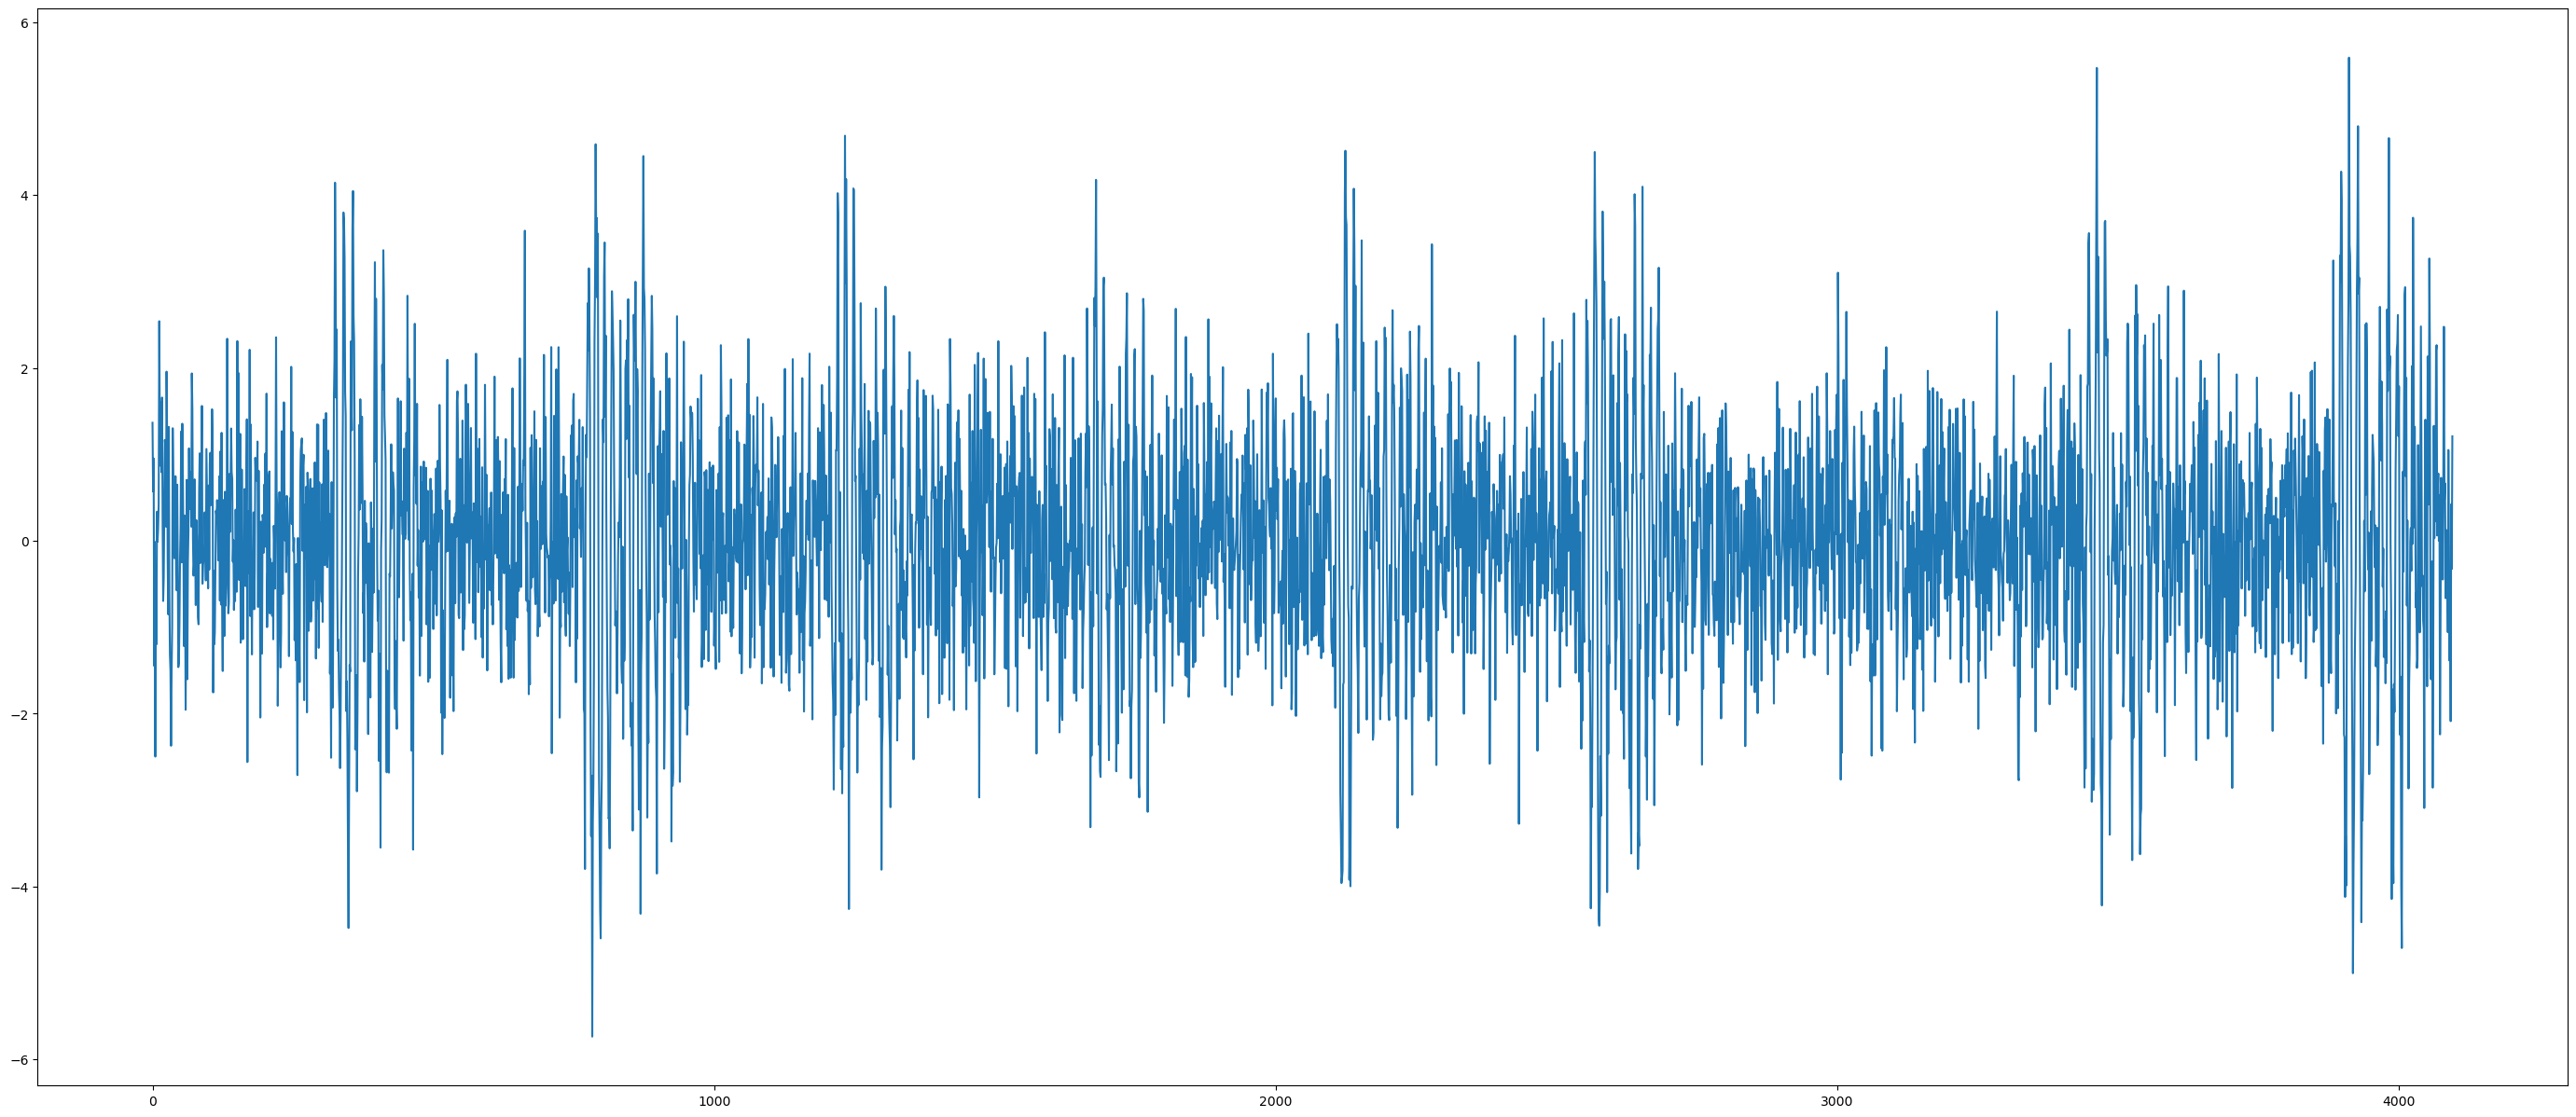

In [16]:
plt.figure(figsize=(35,15))
plt.plot(x,y)

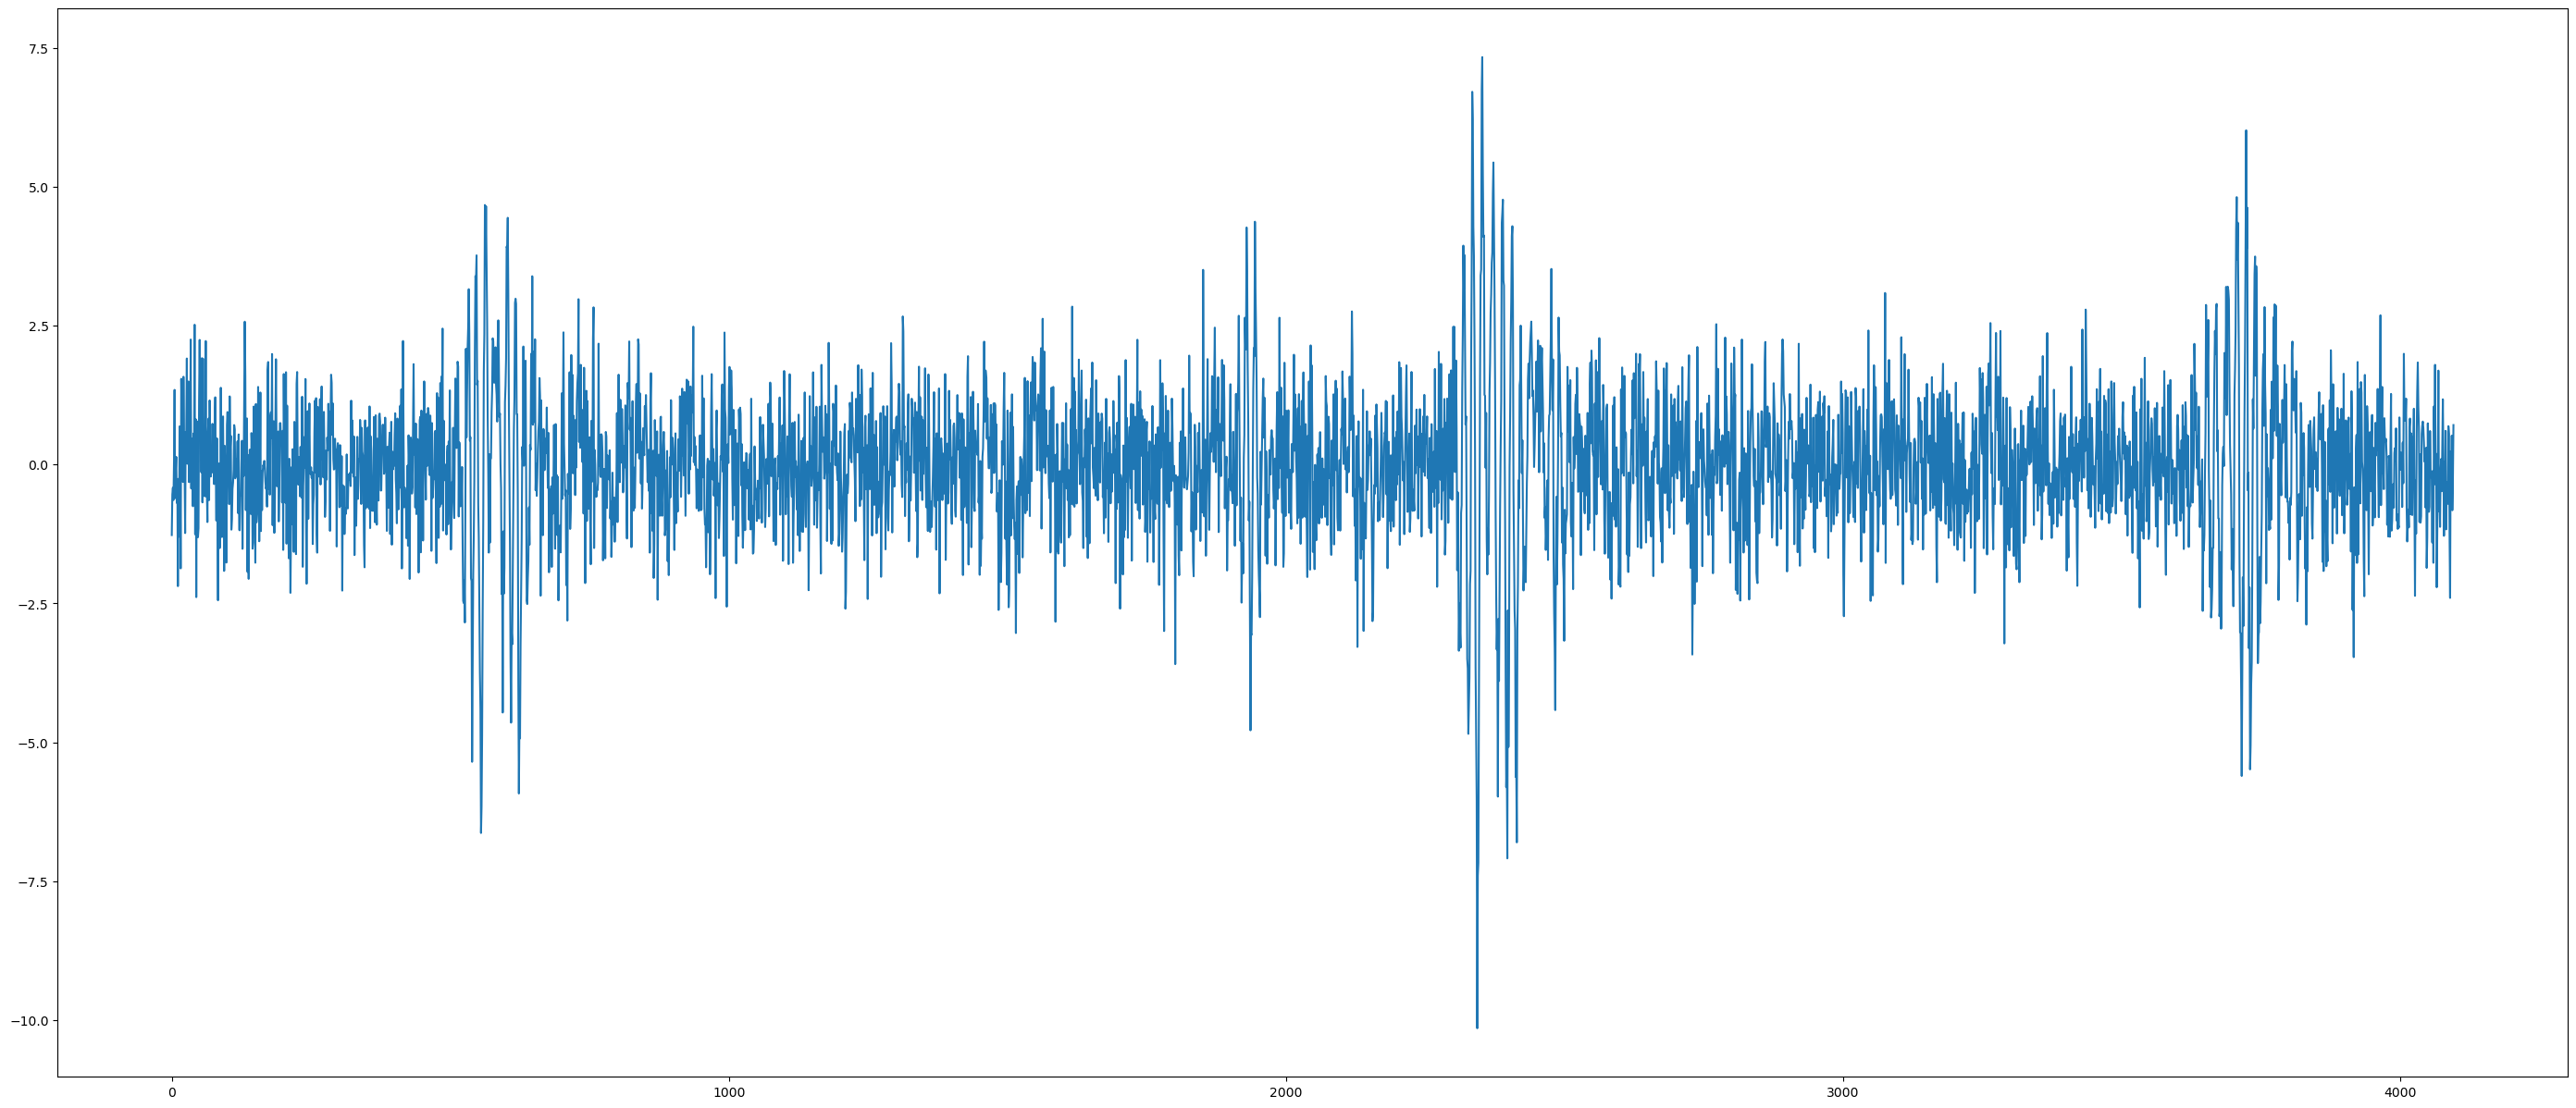

In [32]:
plt.figure(figsize=(35,15))
plt.plot(x,y)

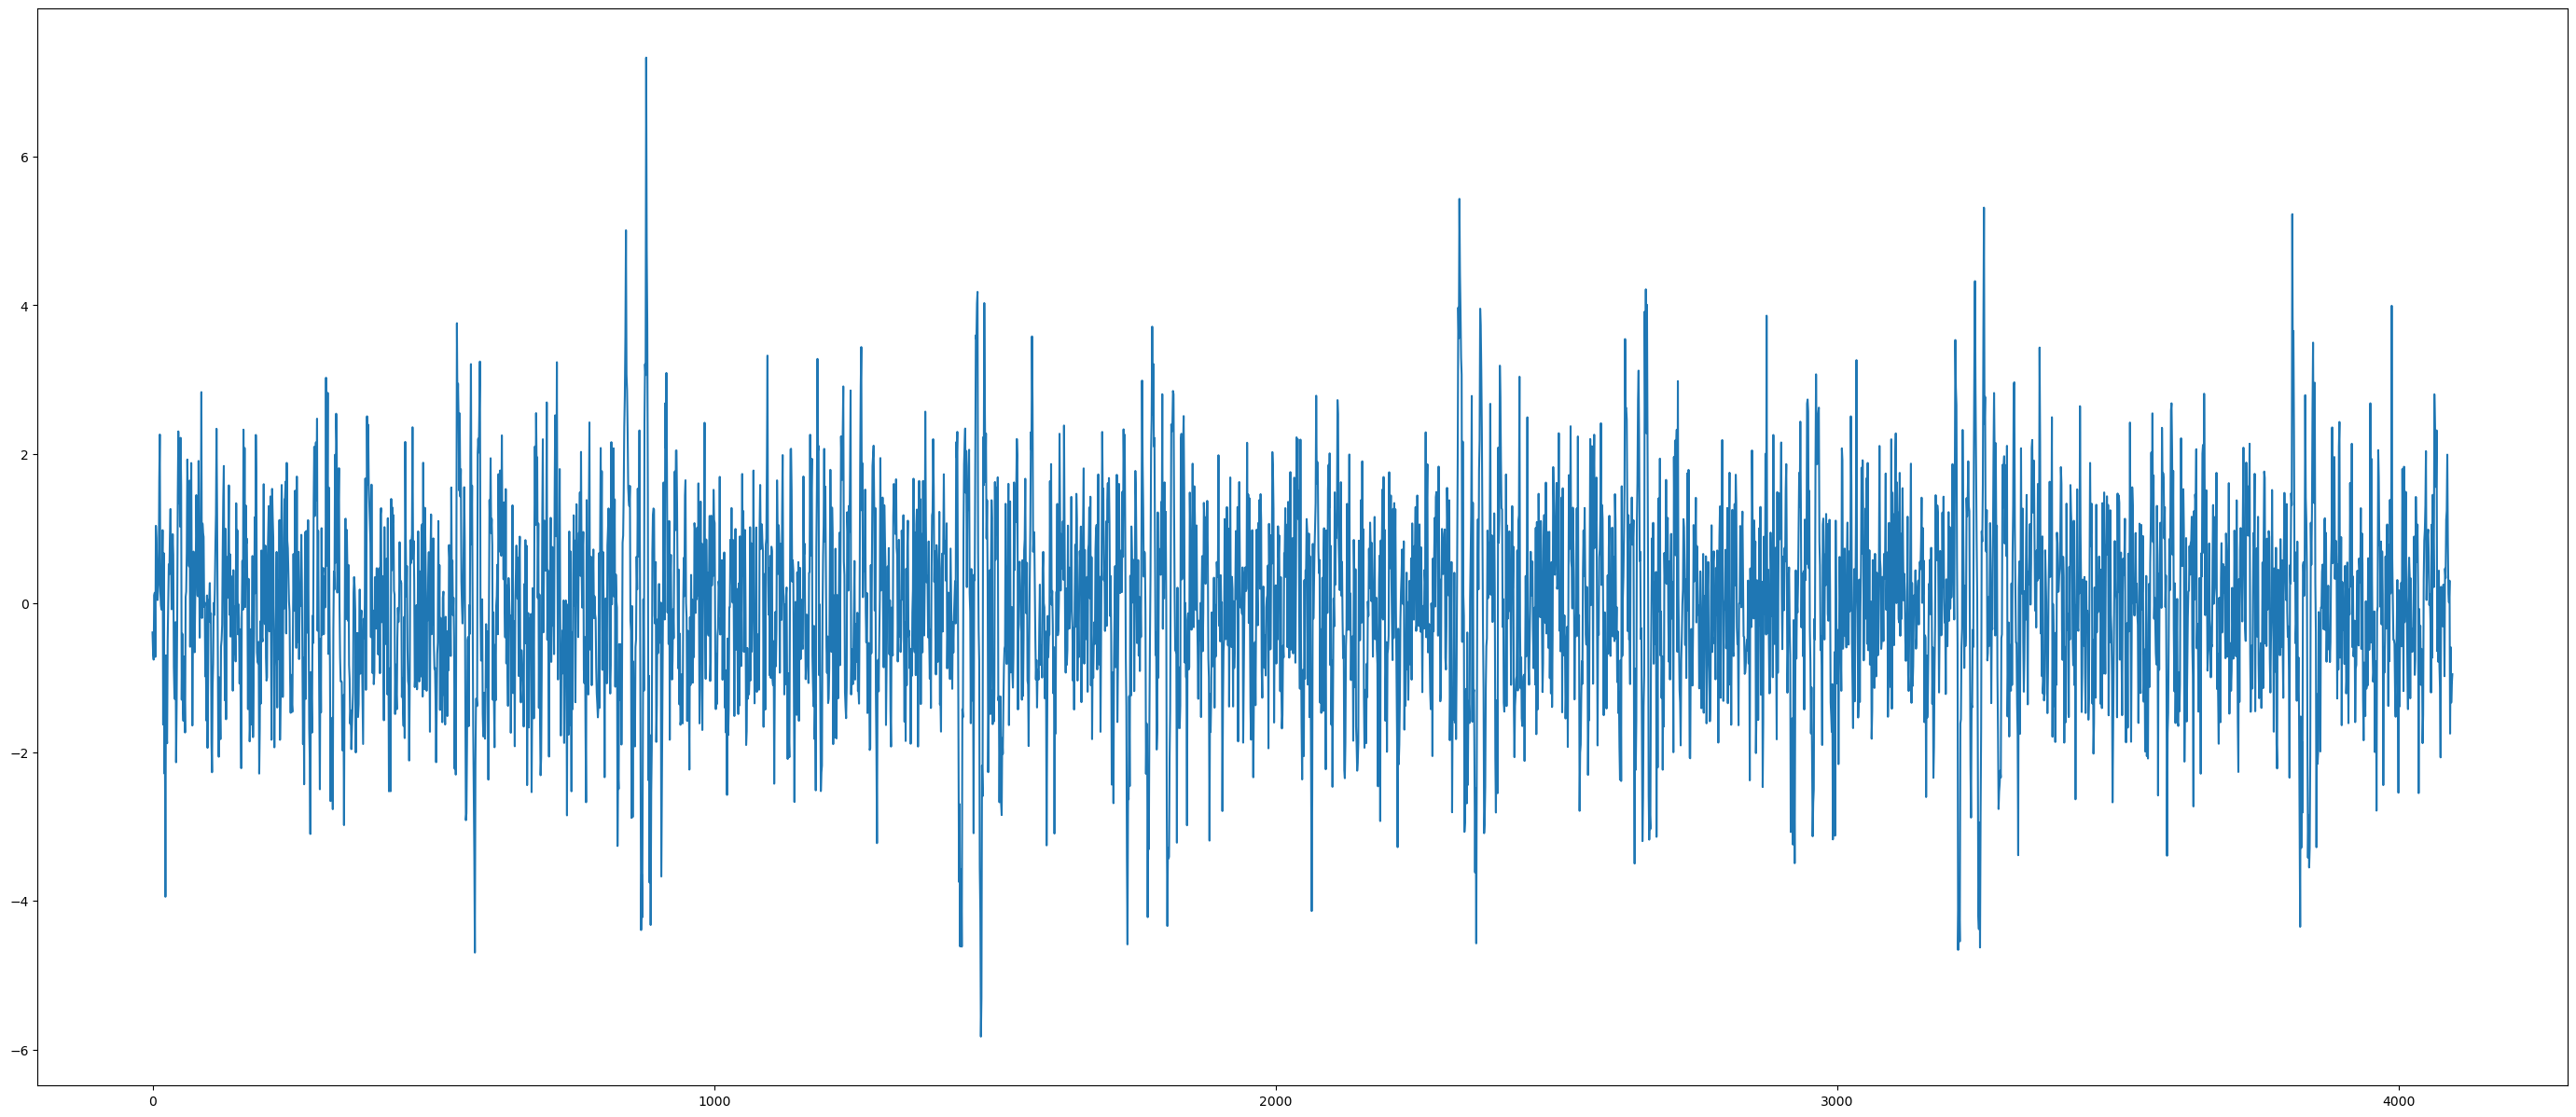

In [19]:
plt.figure(figsize=(35,15))
plt.plot(x,y)

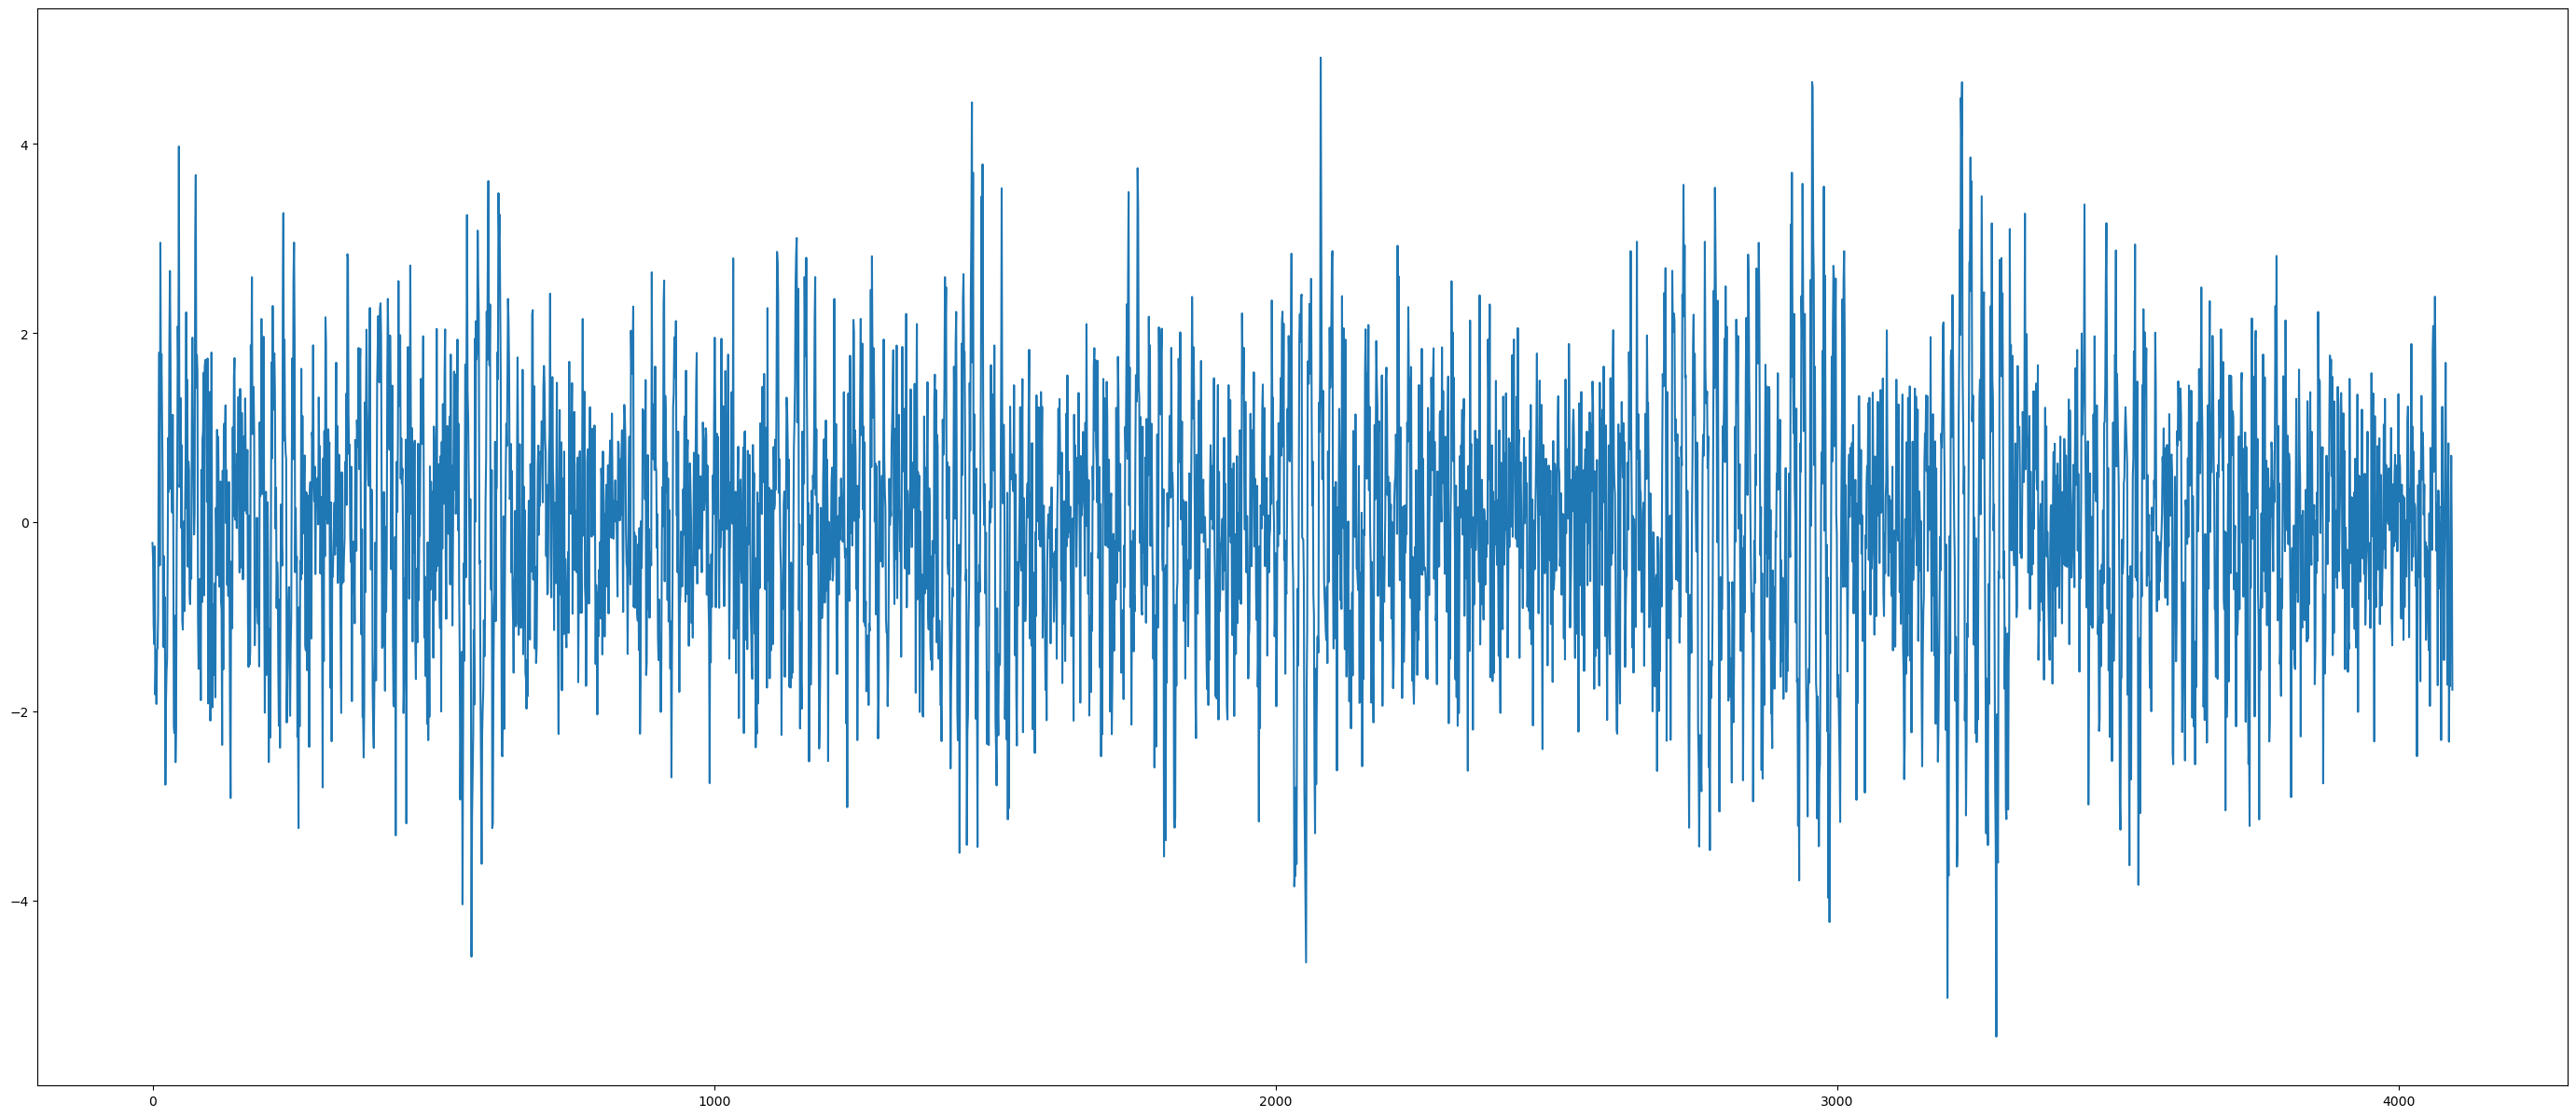

In [30]:
plt.figure(figsize=(35,15))
plt.plot(x,y)

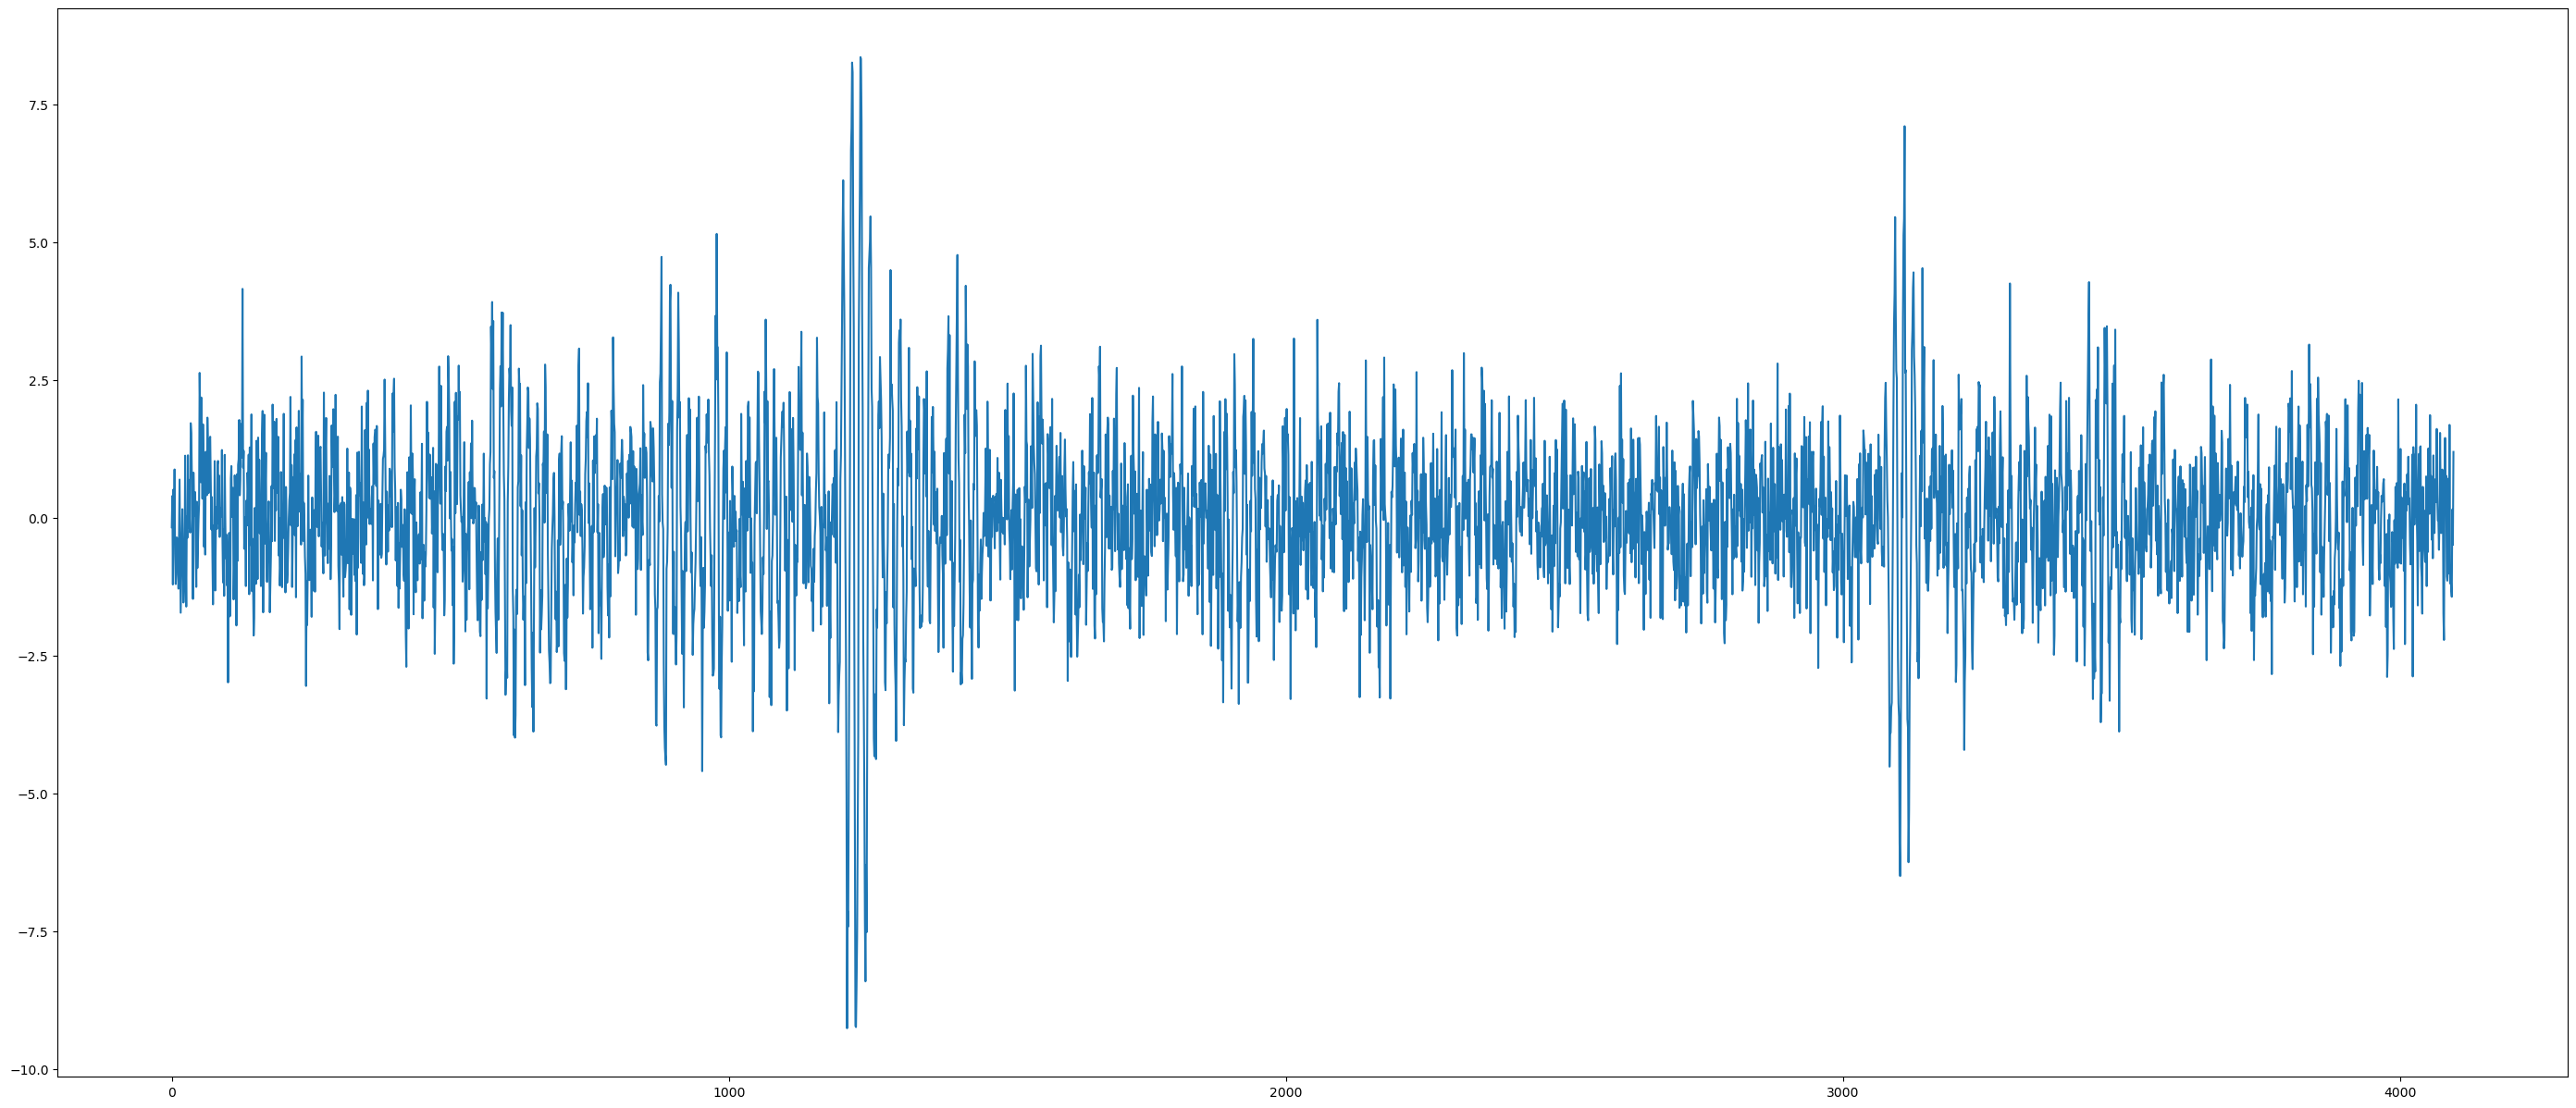

In [22]:
plt.figure(figsize=(35,15))
plt.plot(x,y)

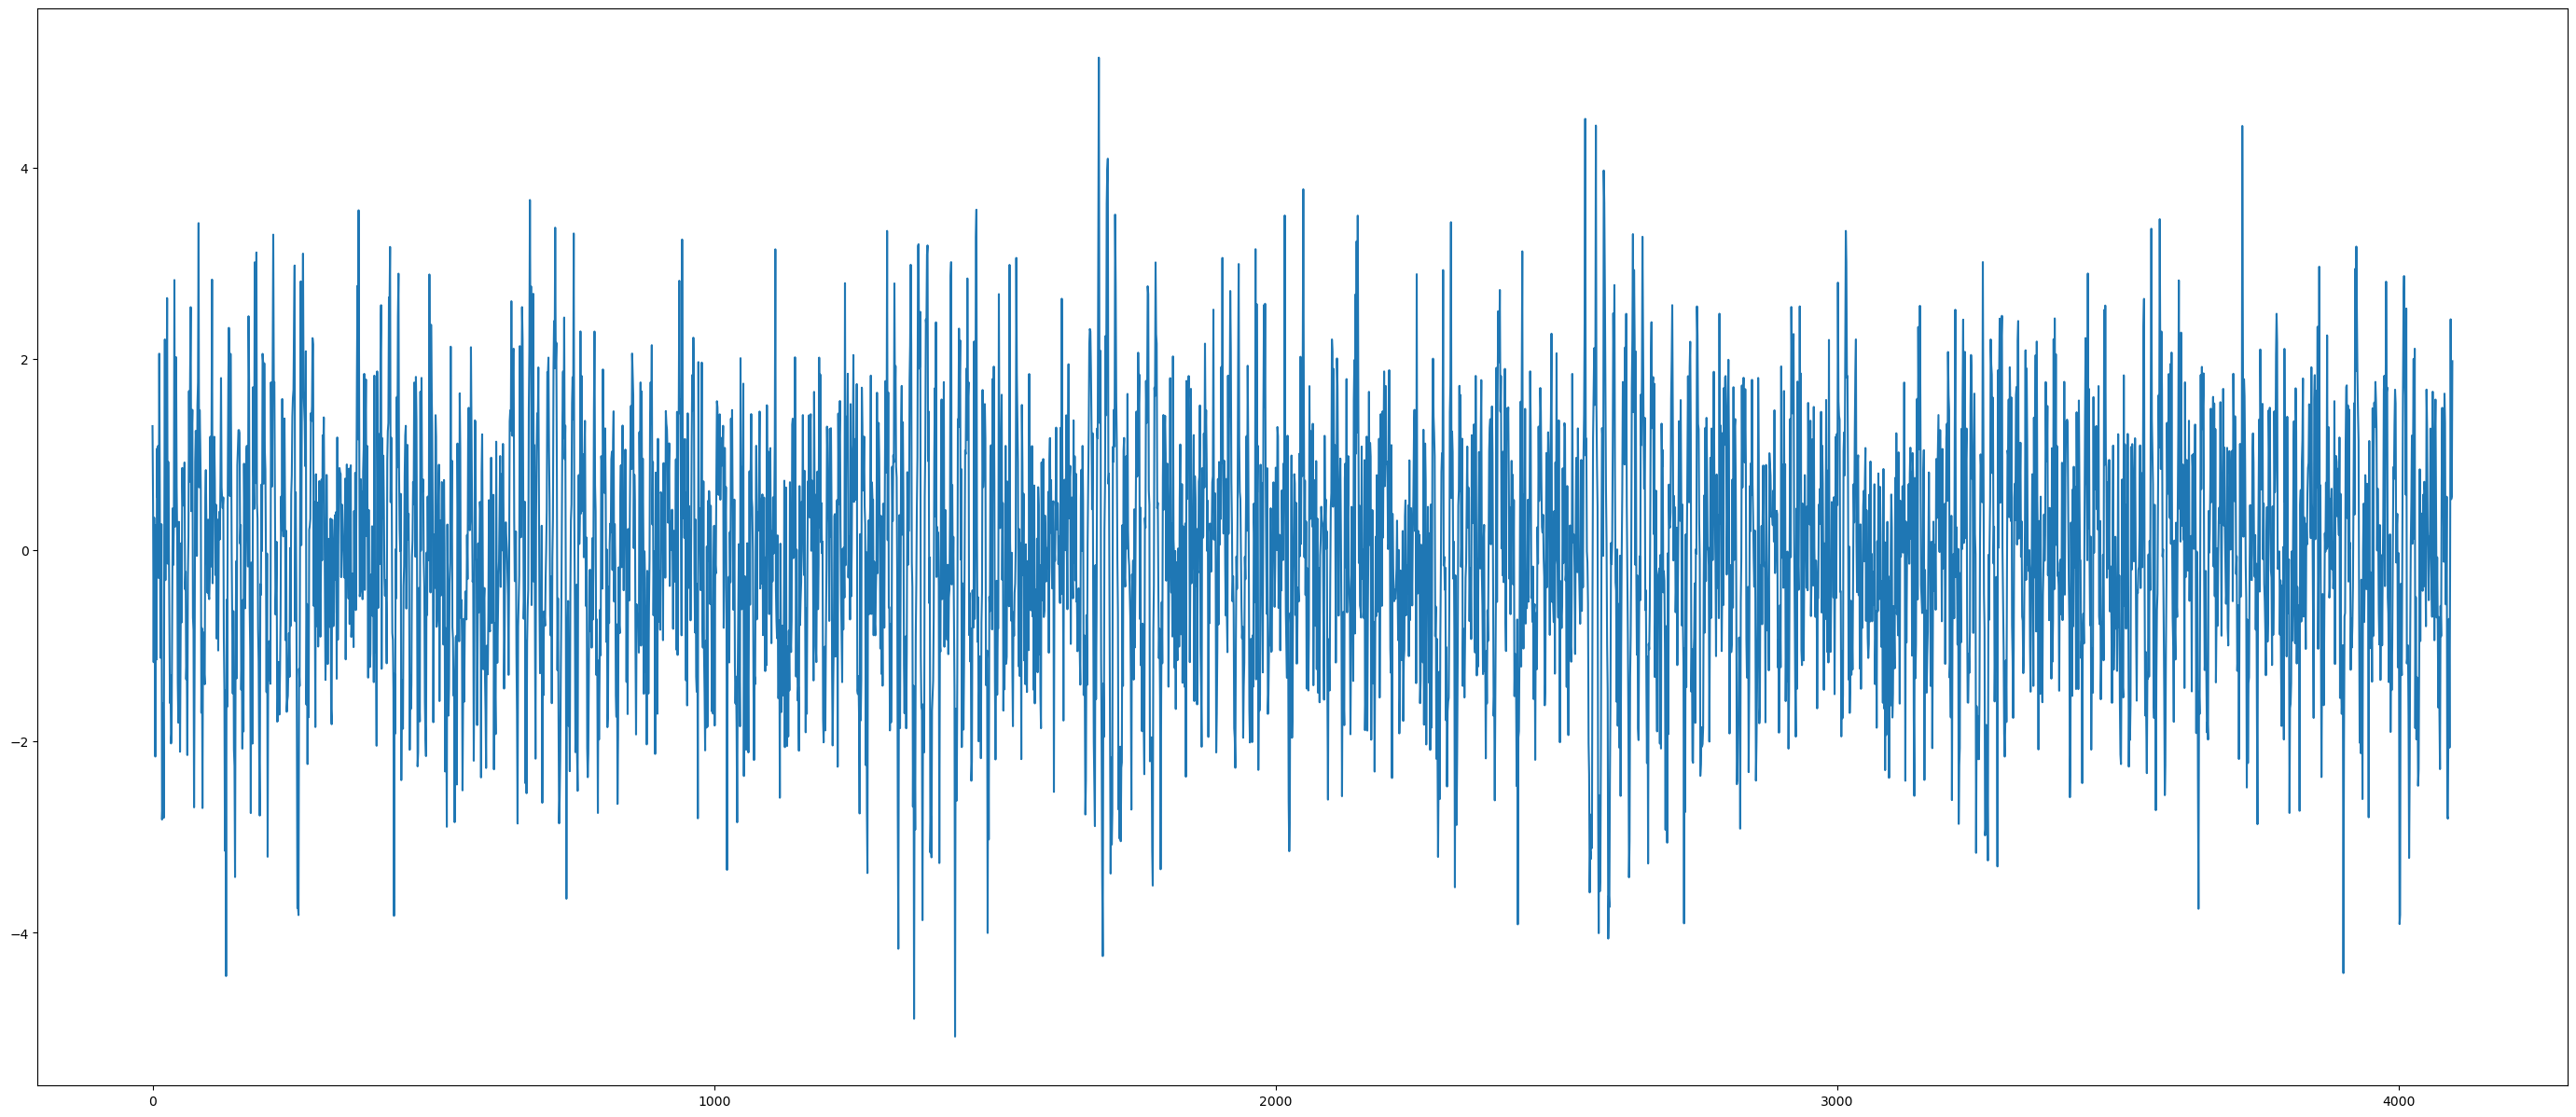

In [28]:
plt.figure(figsize=(35,15))
plt.plot(x,y)

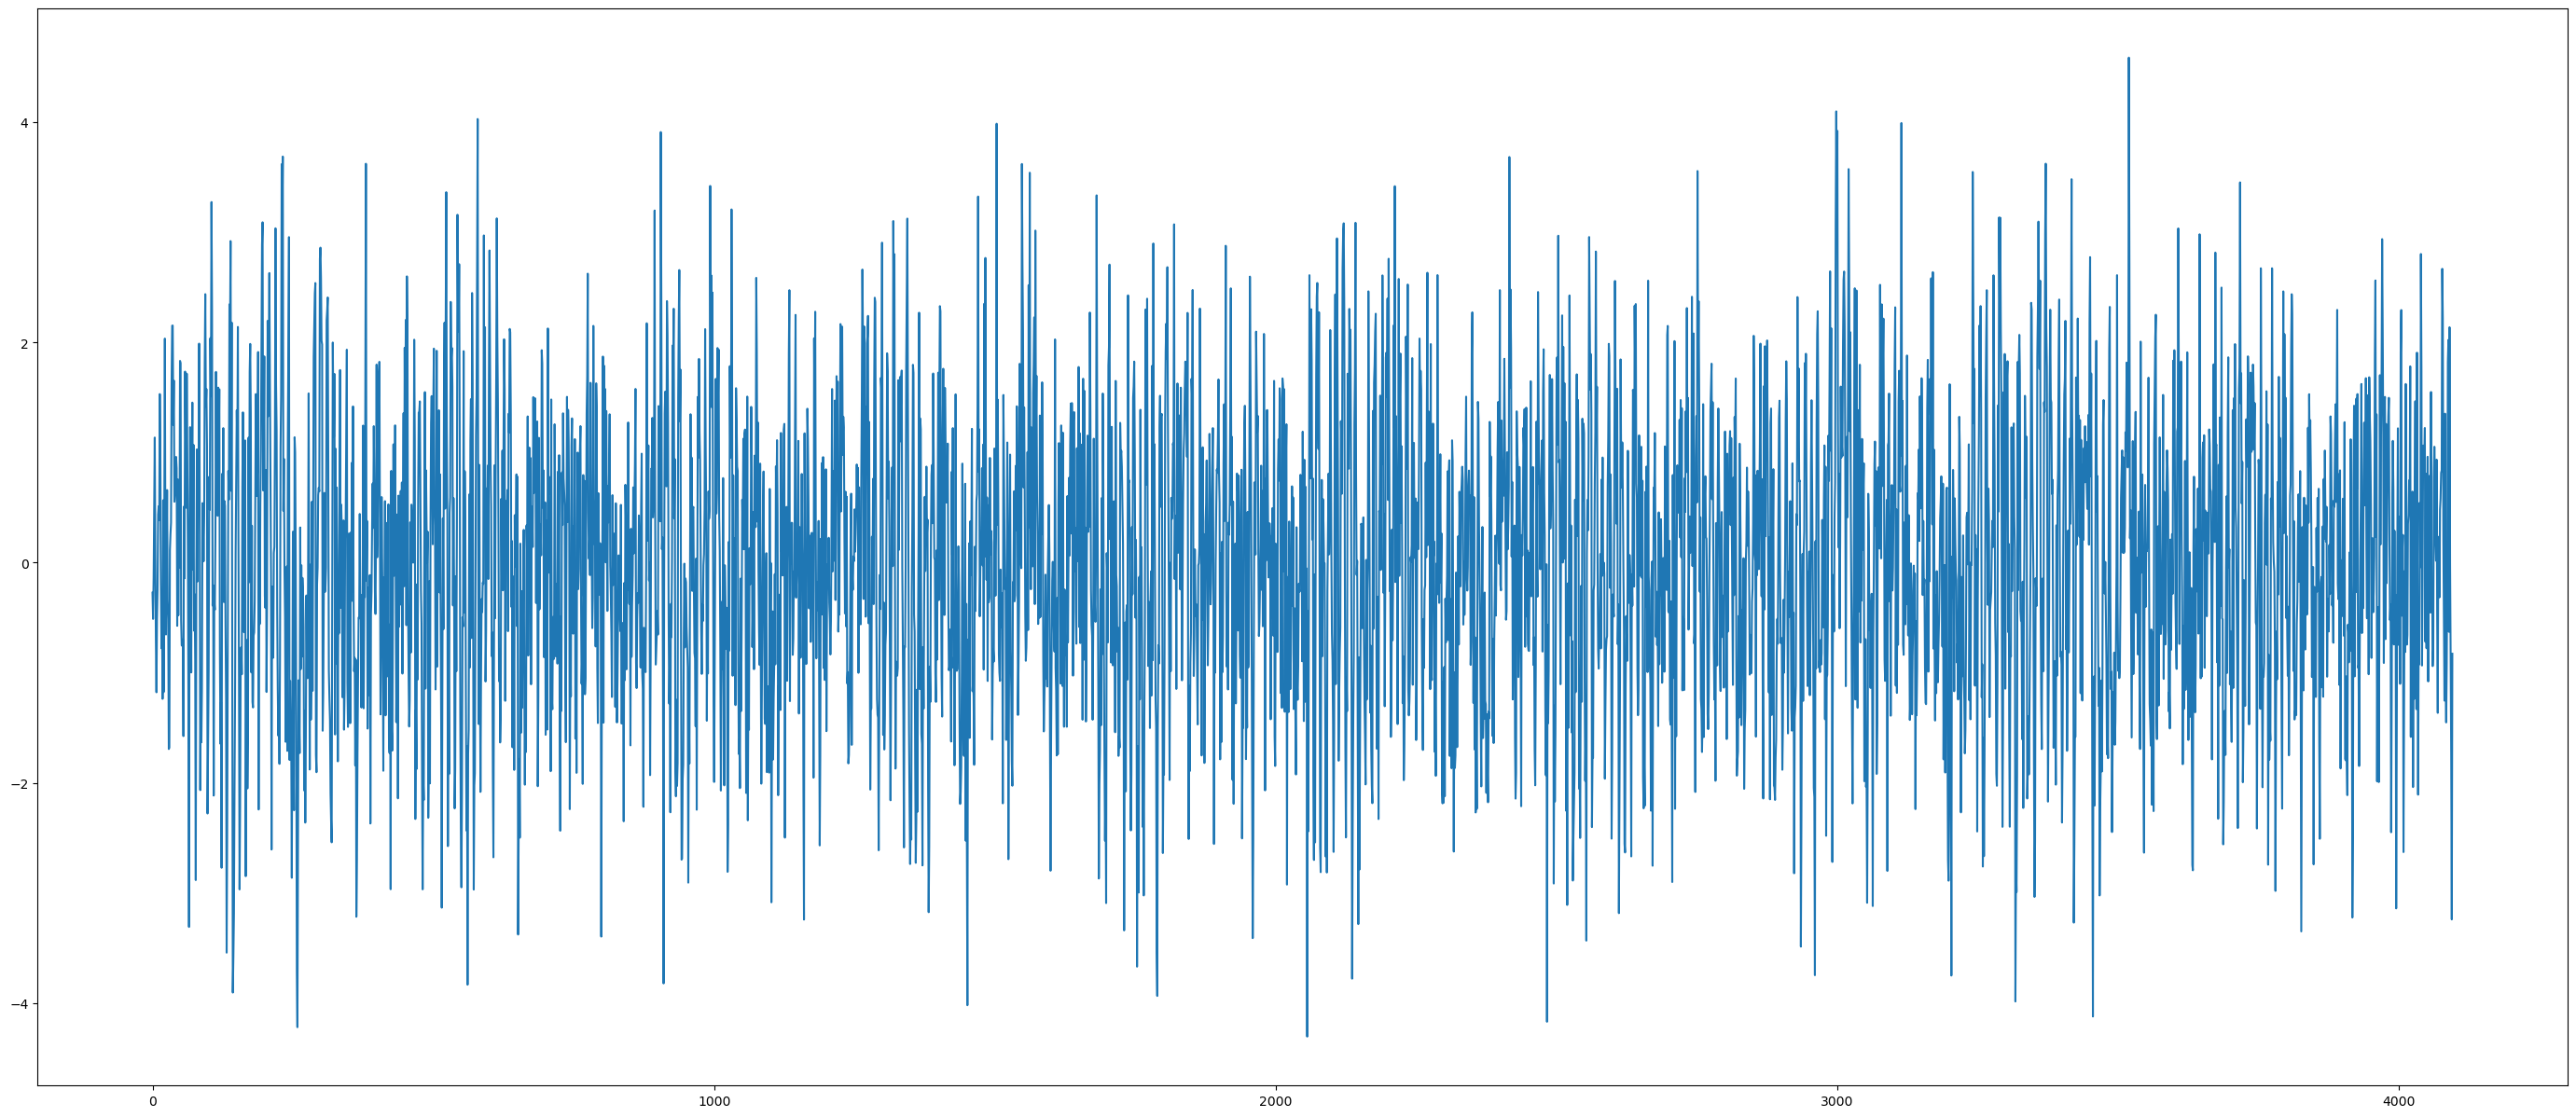

In [24]:
plt.figure(figsize=(35,15))
plt.plot(x,y)

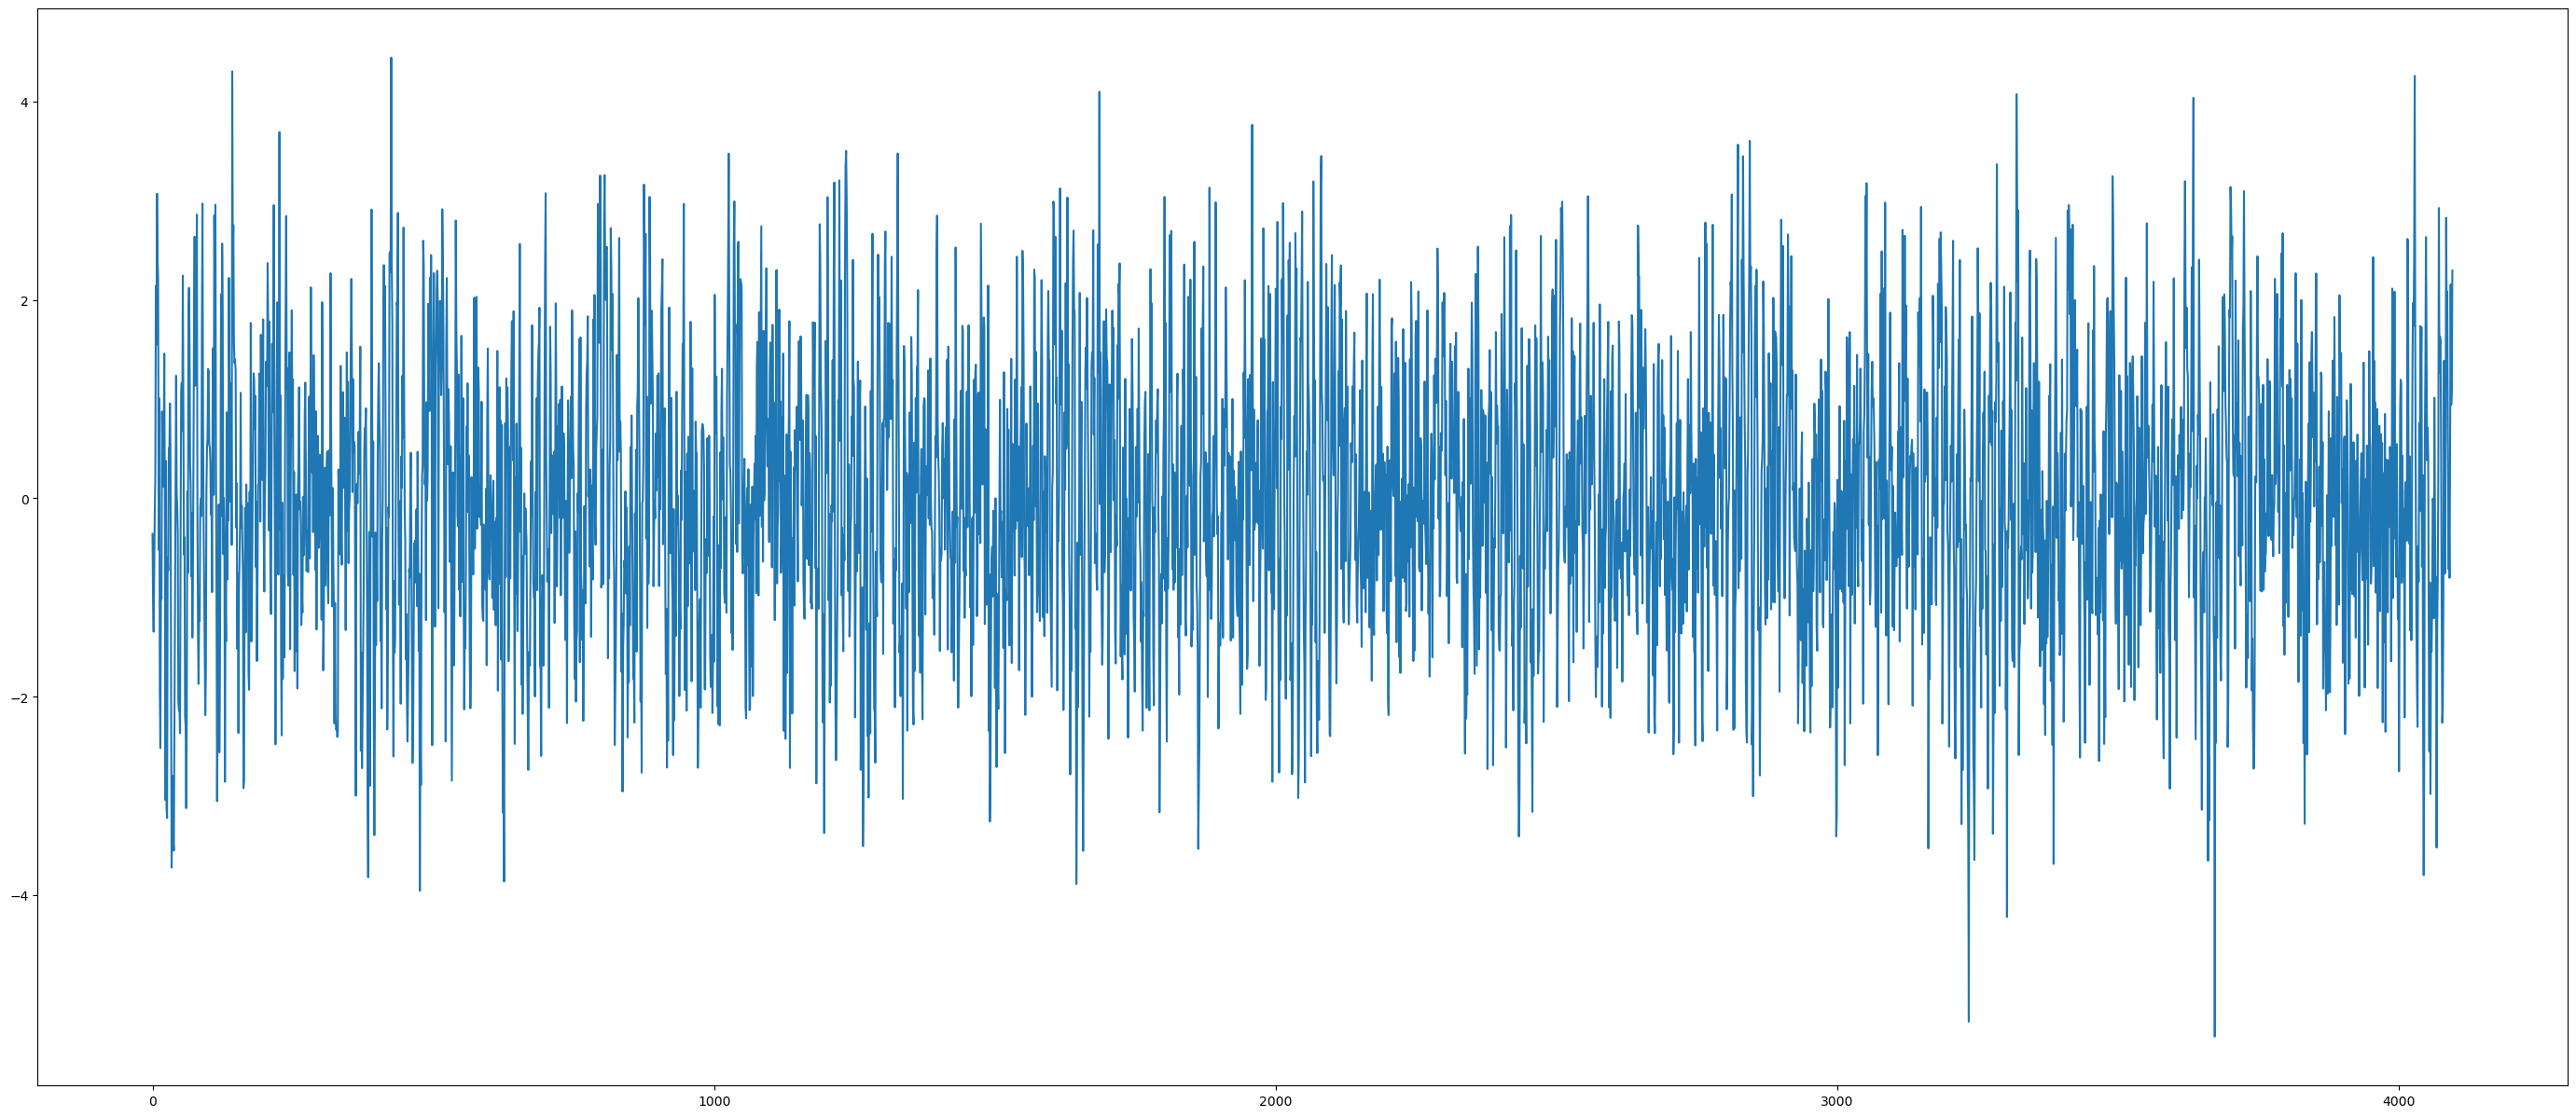

In [26]:
plt.figure(figsize=(35,15))
plt.plot(x,y)